<a href="https://colab.research.google.com/github/sadeelmu/deeplearning/blob/main/Tensors_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center><font color=green align="center"> Introduction to PyTorch</font></center>
# <center><font color=blue align="center"> Frameworks, GPU, Tensors and Operations </font></center>


(c) Research Group CAMMA, University of Strasbourg<br>
Website: http://camma.u-strasbg.fr




Welcome to the practical section of the 3rd lecture on deep learning. <br>
This exercise is divided into 5 parts. Each part is accompanied by one `TODO` exercise.<br>
You also have an additional `Bonus` exercise if you finish very quickly.<br>

**Instructions**:
* Read all the descriptions and code.
* Run the pre-completed cells.
* Fill in the `TODO`blocks and run the code.
* Ensure you are connected to the internet for the notebook image rendering.
* Please ask questions if you have any doubts.

--------


## Part 1:  Introduction to Tensors

<img src="https://drive.google.com/uc?id=1OTDrP_bwN-JECQ02uRzxXxcomB0cYmpU" width="200" style="margin-right: 100px" align="left"/>


**Objectives**:

* 1) To use PyTorch framework and GPU devices
* 2)  To create Tensors
* 3) To inspect the properties of Tensors such as: data types, shapes, ranks and dimensions



<br>**Import PyTorch Frameworks and other libraries**

In [ ]:
import torch
import os
import urllib
from zipfile import ZipFile

from matplotlib import pyplot as plt
import glob

import numpy as np
import pickle
import gzip

<br>**Check your PyTorch version and GPU**

In [ ]:
# check the version; should be greater than 2.0
print("PyTorch version: ", torch.__version__)

# check the GPU support; should be yes
print("Is GPU available ?: ", torch.cuda.is_available())

# check how many GPU(s) are present
print("How many GPU(s) ?", torch.cuda.device_count())

# get the information on the gpu:0
device0 = torch.device('cuda:0')
print("Infos :", torch.cuda.get_device_properties(device0))

PyTorch version:  1.12.1+cu113
Is GPU available ?:  True
How many GPU(s) ? 1
Infos : _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15109MB, multi_processor_count=40)


<br><br>**Creating Tensors**
- create constant tensor of value 5.0
- create a vector tensor with sequential values ranging from 2 to 9
- create a 3x4 matrix tensor with zero values.
- inpect all their properties (such as:  shape, data type, dimension, rank, etc.)
- print their numpy values

In [ ]:
a = torch.tensor(5.0, dtype=torch.float64)
print(a)

tensor(5., dtype=torch.float64)


In [ ]:
b = torch.arange(2,10, dtype=torch.int64)
print(b)

tensor([2, 3, 4, 5, 6, 7, 8, 9])


In [ ]:
c = torch.zeros((3,4), dtype=torch.int32)
print(c)

tensor([[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]], dtype=torch.int32)


In [ ]:
print("Tensor A has a shape of ", (a.shape), ". Its data type is ", (a.dtype) ,". It is a ", len(a.shape),"-D tensor.","\n", "-"*30)
print("Tensor B has a shape of ", (b.shape), ". Its data type is ", (b.dtype) ,". It is a ", len(b.shape),"-D tensor.","\n", "-"*30)
print("Tensor C has a shape of ", (c.shape), ". Its data type is ", (c.dtype) ,". It is a ", len(c.shape),"-D tensor.","\n", "-"*30)


Tensor A has a shape of  torch.Size([]) . Its data type is  torch.float64 . It is a  0 -D tensor. 
 ------------------------------
Tensor A has a shape of  torch.Size([]) . Its data type is  torch.float64 . It is a  1 -D tensor. 
 ------------------------------
Tensor A has a shape of  torch.Size([8]) . Its data type is  torch.int64 . It is a  2 -D tensor. 
 ------------------------------


In [ ]:
print(" A = ", a.numpy(),"\n", "-"*30)
print(" B = ", b.numpy(),"\n", "-"*30)
print(" C = \n", c.numpy(),"\n", "-"*30)

 A =  5.0 
 ------------------------------
 B =  [2 3 4 5 6 7 8 9] 
 ------------------------------
 C = 
 [[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]] 
 ------------------------------


#### <font color=red> <br><br><u><b>TODO</b></u> 1:</font>
![alt text](https://drive.google.com/uc?id=11u8_8XXjFkqFPVtSS4Q7PW_S3ZxppLaD)
- Generate the tensor in the figure.
- Generate also a 5x2 tensors with gaussian distributed values.
- Finally, generate a boolean list (1,1,0,1,0).
- Display their numpy values to confirm.
- Inspect the shape and data type of the generated tensors.

In [ ]:
# Tensor in the figure
a = torch.tensor([[5.2, 7.5], [4.2, 5.7]], dtype=torch.float64)
print(a)

tensor([[5.2000, 7.5000],
        [4.2000, 5.7000]], dtype=torch.float64)


In [ ]:
# 5x2 random value tensor
b = torch.normal(0, 1, size=(5, 2))
print(b)

tensor([[-0.8264,  1.5382],
        [-0.7222, -0.2963],
        [ 0.1676,  0.3015],
        [ 1.4039, -0.7091],
        [ 1.0587,  0.8670]])


In [ ]:
# Boolean tensor with values (1,1,0,1,0)
c = torch.tensor([True, True, False, True, False], dtype=torch.bool)
print(b)

tensor([[-0.8264,  1.5382],
        [-0.7222, -0.2963],
        [ 0.1676,  0.3015],
        [ 1.4039, -0.7091],
        [ 1.0587,  0.8670]])


In [ ]:
# Tensor values
print(a.numpy())
print("--------------------------------")
print(b.numpy())
print("--------------------------------")
print(c.numpy())

[[5.2 7.5]
 [4.2 5.7]]
--------------------------------
[[-0.82636523  1.5381798 ]
 [-0.7221668  -0.29626942]
 [ 0.16759463  0.30151466]
 [ 1.4038903  -0.70913124]
 [ 1.0587438   0.866963  ]]
--------------------------------
[ True  True False  True False]


In [ ]:
# Tensor properties
print("A | shape = {} | data type = {}".format(a.shape, a.dtype))
print("--------------------------------")
print("B | shape = {} | data type = {}".format(b.shape, b.dtype))
print("--------------------------------")
print("C | shape = {} | data type = {}".format(c.shape, c.dtype))

A | shape = torch.Size([2, 2]) | data type = torch.float64
--------------------------------
B | shape = torch.Size([5, 2]) | data type = torch.float32
--------------------------------
C | shape = torch.Size([5]) | data type = torch.bool


<br><hr />

## Part 2: Tensor Operations

<img src="https://developer.nvidia.com/blog/wp-content/uploads/2019/01/Tensor-Core-Matrix.png" width="500"  style="margin-right: 100px" align="left"/>

**Objectives**:

- 1) To modify the properties of tensors
- 2) To query tensors values and properties
- 3) To manipulate the values of tenosrs




**<br><br>Tensor modification**
- Generate a 1D tensor with a sequential values ranging from 0 to 19 and print the values.
- Reshape it to 4x5 matrix tensors and inspect the shape and values
- Convert to a float tensor and inspect the data type.
- Duplicate the tensor and concatenate them side by side and inspect their shapes.


In [ ]:
a = torch.arange(20, dtype=torch.int64)  # if start == 0 and the delta ==1, then you don't need to specify start, and delta.

print(" Shape A = ", a.shape)
print("------------------------------------------------------------------")
print(" Value A = \n", a.numpy())

 Shape A =  torch.Size([20])
------------------------------------------------------------------
 Value A = 
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


In [ ]:
b = torch.reshape(a, shape=(4,5))

print(" Shape B = ", b.shape)
print("------------------------------------------------------------------")
print(" Value B = \n", b.numpy())

 Shape B =  torch.Size([4, 5])
------------------------------------------------------------------
 Value B = 
 [[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]]


In [ ]:
c = b.to(dtype=torch.float64)

print(" Type B = ", b.dtype, " but Type C = ", c.dtype)

 Type B =  torch.int64  but Type C =  torch.float64


In [ ]:
d = torch.clone(c)
e = torch.cat((c,d), axis=1)


print(" Shape D = ", d.shape)
print(" Shape E = ", e.shape)
print("------------------------------------------------------------------")
print(" Value E = \n", e.numpy())

 Shape D =  torch.Size([4, 5])
 Shape E =  torch.Size([4, 10])
------------------------------------------------------------------
 Value E = 
 [[ 0.  1.  2.  3.  4.  0.  1.  2.  3.  4.]
 [ 5.  6.  7.  8.  9.  5.  6.  7.  8.  9.]
 [10. 11. 12. 13. 14. 10. 11. 12. 13. 14.]
 [15. 16. 17. 18. 19. 15. 16. 17. 18. 19.]]


**<br><br>Query Tensor**
Continuing with the concatenated tensor (e) in the previous exercise.
- Slice the tensor and display only the first column values.
- Slice the tensor and display only the last row values.
- Slice the tensor and display the values within column 2<sup>nd</sup> - 5<sup>th</sup> and row 1<sup>st</sup> - 3<sup>rd</sup>.
- Find the maximum values for each row.
- Find the average values for each column.
- Find the overall minimum value of the tensor.


In [ ]:
e1 = e[:,0]
print(e1.numpy())

[ 0.  5. 10. 15.]


In [ ]:
e2 = e[-1,:]
print(e2.numpy())

[15. 16. 17. 18. 19. 15. 16. 17. 18. 19.]


In [ ]:
e3 = e[0:2, 1:4]
print(e3.numpy())

[[1. 2. 3.]
 [6. 7. 8.]]


In [ ]:
e4 = torch.max(e, axis=1)
print(e4, "\n", '-'*20)
print(e4.values.numpy(), "\n", '-'*20)

torch.return_types.max(
values=tensor([ 4.,  9., 14., 19.], dtype=torch.float64),
indices=tensor([4, 4, 4, 4])) 
 --------------------
[ 4.  9. 14. 19.] 
 --------------------


In [ ]:
e5 = torch.mean(e, axis=0)
print(e5.numpy())

[ 7.5  8.5  9.5 10.5 11.5  7.5  8.5  9.5 10.5 11.5]


In [ ]:
e6 = torch.min(e)
print(e6.numpy())

0.0


**<br><br>Tensor Operations**

Let's implement the following algorithm:
- x = a 3x3 matrix tensor of random values.
- y = $ 2x^2 + 12$
- z = $\sqrt{y} - cos x$
- f = scale z between 0 and 1
- print the values.



In [ ]:
x = torch.rand((3,3), dtype=torch.float32)

In [ ]:
y = 2 * torch.pow(x,2) + 12.0

In [ ]:
z = torch.sqrt(y) - torch.cos(x)

In [ ]:
f = torch.sigmoid(z)

In [ ]:
print("Value x = \n", x.numpy())
print("------------------------------------------------------------------")
print("Value y = \n", y.numpy())
print("------------------------------------------------------------------")
print("Value z = \n", z.numpy())
print("------------------------------------------------------------------")
print("Value f = \n", f.numpy())
print("------------------------------------------------------------------")

Value x = 
 [[0.11902738 0.61740357 0.8040066 ]
 [0.7088125  0.902791   0.01779908]
 [0.11966002 0.27405447 0.47481042]]
------------------------------------------------------------------
Value y = 
 [[12.028335 12.762374 13.292853]
 [13.00483  13.630063 12.000633]
 [12.028637 12.150211 12.45089 ]]
------------------------------------------------------------------
Value z = 
 [[2.4752645 2.7570622 2.9521096]
 [2.8470855 3.0724702 2.4643514]
 [2.4753833 2.5230339 2.6392026]]
------------------------------------------------------------------
Value f = 
 [[0.92238945 0.94031096 0.9503631 ]
 [0.9451678  0.9557428  0.9216047 ]
 [0.922398   0.92574084 0.9333424 ]]
------------------------------------------------------------------


#### <font color=red><br><br><u><b>TODO</b></u> 2:</font>
- x = generate a 1D tensor of any length with random values.
- x = | x * 100 | - 2.0
- check that:    $tan(x) = \frac{sin(x)}{cos(x)}$ .
- check that:    sin<sup> 2</sup>(x) + cos<sup>2</sup>(x) = 1 .
- print the values and cross check if your answers are correct all the time?

In [ ]:
x = torch.rand((1,5), dtype=torch.float64)

In [ ]:
x = torch.abs(x*100) -2

In [ ]:
p1 = torch.tan(x)
p2 = torch.sin(x)/torch.cos(x)

print(p1)
print(p2)

tensor([[-3.4747,  1.6813, -0.7027, -0.5093, -0.0289]], dtype=torch.float64)
tensor([[-3.4747,  1.6813, -0.7027, -0.5093, -0.0289]], dtype=torch.float64)


In [ ]:
p3 = torch.pow(torch.sin(x), 2) + torch.pow(torch.cos(x), 2)

print(p3)

tensor([[1., 1., 1., 1., 1.]], dtype=torch.float64)


<br><hr />

## Part 3: Functions and Derivatives

<img src="https://miro.medium.com/max/3040/1*q1M7LGiDTirwU-4LcFq7_Q.png" width="600" height="120"  style="margin-right: 100px" align="left"/>



**Objectives**:

- 1) To build a PyTorch function
- 2) To automatically differentiate PyTorch functions




<br><br>**Functions**

build the following functions:
- $y = 2x^2 + 12$
- $f(x, y) = x^3 + x^2y + xy^2 + y^3 + 0.3$

In [ ]:
# define the function
def eqn1(x):
    return (2.0 * (x**2)) + 12.0


In [ ]:
# define the function
def eqn2(x,y):
    return (x**3) + (x**2 * y) + (x * y**2) + (y**3) + 0.3


<br><br>**Derivatives**

Using `torch.autograde` to compute automatic differentiations of:
- $ \frac{dy}{dx} $ and solve for $x=5.0$.
- $ \frac{df(x,y)}{d_xd_y} $ and solve for $x=2.0,   y=3.0$.


In [ ]:
# Given that x = 5.0
x = torch.tensor(5., requires_grad=True)

y = eqn1(x)
y.backward()

print("\nFunction ::: f = {} ".format(y.detach().numpy()))
print("\nGradient ::: gd = {} ".format(x.grad.numpy()))



Function ::: f = 62.0 

Gradient ::: gd = 20.0 


In [ ]:

# Given that x=2 and y=3
x   = torch.tensor(2.0, requires_grad=True)
y   = torch.tensor(3.0, requires_grad=True)

f = eqn2(x,y)
f.backward()

print(f)
print(y.grad)


tensor(65.3000, grad_fn=<AddBackward0>)
tensor(43.)


In [ ]:
# Given that x=2 and y=3
x   = torch.tensor(2.0, requires_grad=True)
y   = torch.tensor(3.0, requires_grad=True)


# Gradients
f = eqn2(x,y)
f.backward()

print("\nFunction  ::: f(x,y) = {}".format(f.detach().numpy()))
print("\nGradients ::: df/dx = {} and df/dy = {} ".format(x.grad.numpy(), y.grad.numpy()))



Function  ::: f(x,y) = 65.30000305175781

Gradients ::: df/dx = 33.0 and df/dy = 43.0 


#### <font color=red><br><br><u><b>TODO</b></u> 3:</font>

Given the function :
###  $g =  \frac{1}{1+e^{-(w_0 x_0 + w_1 x_1 + w_2)}}$

- Implement the function and find the gradients of all variables given that <br>: $w_0=4.0$ ,  $x_0=1.0$ ,  $w_1=2.0$ ,  $x_1=-1.0$ ,  $w_2=-3.0$.
- Compare your answer from the lecture 2.

In [ ]:
# define function
def g(w0, x0, w1, x1, w2):
     return 1/(1+torch.exp(-1 *(w0*x0 + w1*x1 + w2)))

# Given the values
w0 = torch.tensor(4.0, requires_grad=True)
x0 = torch.tensor(1.0, requires_grad=True)
w1 = torch.tensor(2.0, requires_grad=True)
x1 = torch.tensor(-1.0, requires_grad=True)
w2 = torch.tensor(-3.0, requires_grad=True)

gxw = g(w0, x0, w1, x1, w2)
gxw.backward()

# print the results
print("\nFunction  ::: g(x,w) = {}".format(gxw.detach().numpy()))
print("Gradients :::\n gd(w0)= {} \n gd(x0)= {} \n gd(w1)={} \n gd(x1)= {} \n gd(w2)= {}".format(
      w0.grad.numpy(), x0.grad.numpy(), w1.grad.numpy(), x1.grad.numpy(), w2.grad.numpy()))



Function  ::: g(x,w) = 0.2689414322376251
Gradients :::
 gd(w0)= 0.1966119408607483 
 gd(x0)= 0.7864477634429932 
 gd(w1)=-0.1966119408607483 
 gd(x1)= 0.3932238817214966 
 gd(w2)= 0.1966119408607483


<br>
<br>
<br><hr />

## Part 4: Image Manipulation

<img src="https://drive.google.com/uc?id=13Uwu2cUmk_j2OXtYSNxsQRig1PgE2Rk3" width="300" height="120"  style="margin-right: 100px" align="left"/>

**Objectives**:

- 1) To load and display images
- 2) To learn image to tensor conversion
- 3) To learn image processing
- 4) To learn image data augmentation




<br><br>**Download data**

Let's download the image dataset we will be using for this task.

In [ ]:
# Download some sample images
!wget https://seafile.unistra.fr/f/ffd85d0a967c40eca93f/?dl=1 --content-disposition &&  unzip -qq sample_images.zip

In [ ]:
filepath='sample_images/' # add your own path. Where to save the dataset

<br><br>**Loading and dispalying image data**

(442, 658, 3)


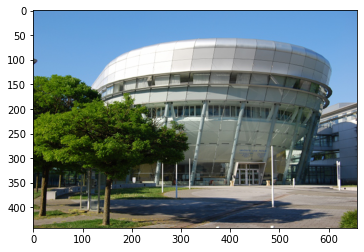

In [ ]:
# read image file
icube_img = plt.imread(filepath+"icube.jpg")

# display image
plt.imshow(icube_img)

# check the image shape
print(icube_img.shape)

<br><br>**Convert image to tensor**

/usr/local/lib/python3.7/dist-packages/torchvision/transforms/functional.py:150: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:172.)
  img = torch.from_numpy(pic.transpose((2, 0, 1))).contiguous()


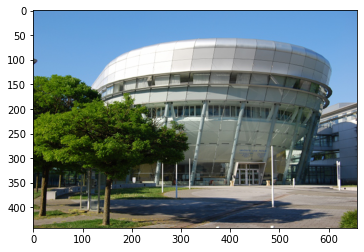

In [ ]:
import torchvision.transforms.functional as TF
from torchvision.transforms import ToTensor, ToPILImage, Grayscale, Compose, RandomRotation
icube_tensor = ToTensor()(icube_img)

# display the tensor image
plt.imshow(ToPILImage()(icube_tensor))

<br><br>**Image processing**

We have learnt how to manipulate images in the class. Let's practice here.
    
 - img  = Read the image of flower
 - img1 = Rotate by 90 degrees
 - img2 = transpose image
 - img3 = flip vertically
 - img4 = resize (shrink) 10 times smaller than original size
 - img5 = crop 30% of the center
 - img6 = Can you crop exactly only the flower? using `tf.image.crop_to_bounding_box?` (_Do only 3 trials and proceed to next task_)

In [ ]:

img = plt.imread(filepath+"flower.jpg")

# convert to tensor variable
img = ToTensor()(img)
print("Image shape = ",img.shape)

# rotate
img1 = TF.rotate(img, angle=75)

# Transpose
img2 = TF.vflip(TF.hflip(img))

# Vertical flipping
img3 = TF.vflip(img)

# shrink img x 10
img4 = TF.resize(img, (43, 78))

# Crop 30% in the middle
img5 = TF.center_crop(img, 100)


Image shape =  torch.Size([3, 177, 284])


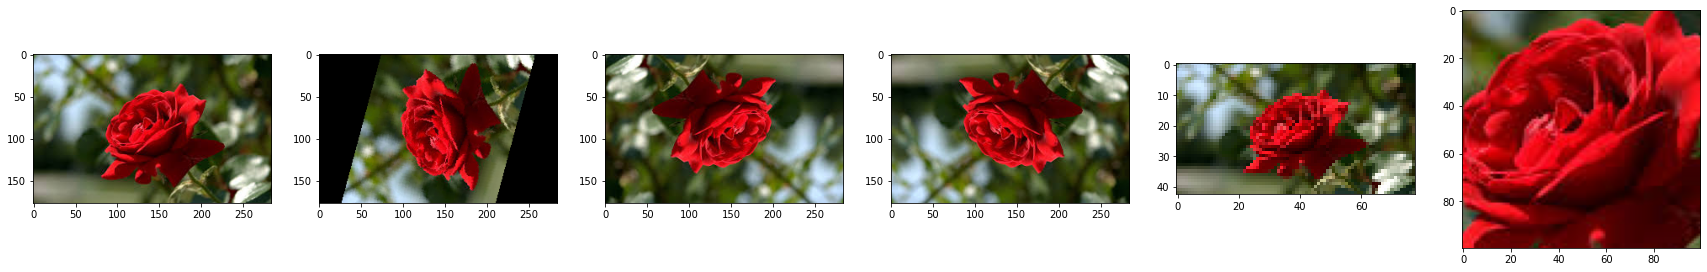

In [ ]:
# plot the images
fig = plt.figure(figsize=(35,7))
fig.add_subplot(1, 7, 1); plt.imshow(ToPILImage()(img))
fig.add_subplot(1, 7, 2); plt.imshow(ToPILImage()(img1))
fig.add_subplot(1, 7, 3); plt.imshow(ToPILImage()(img2))
fig.add_subplot(1, 7, 4); plt.imshow(ToPILImage()(img3))
fig.add_subplot(1, 7, 5); plt.imshow(ToPILImage()(img4))
fig.add_subplot(1, 7, 6); plt.imshow(ToPILImage()(img5))
plt.show()

#### <font color=red><br><br><u><b>TODO</b></u> 4:</font>

- Read and display the image of petite-france.jpg
- Transform it to a grayscale image ( PS: to display, slice the channel as img[:, :, 0] )
- Add the brightness


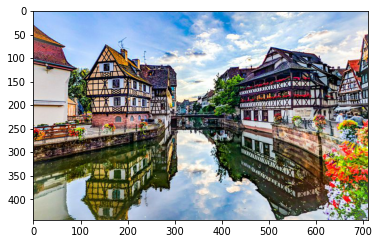

In [ ]:
petitefrance = plt.imread(filepath+"petite-france.jpg")
plt.imshow(petitefrance)

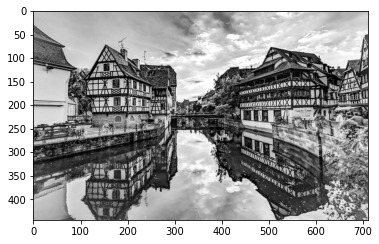

In [ ]:
petitefrance_gray = Grayscale()(ToTensor()(petitefrance))
plt.imshow(ToPILImage()(petitefrance_gray), cmap='gray')

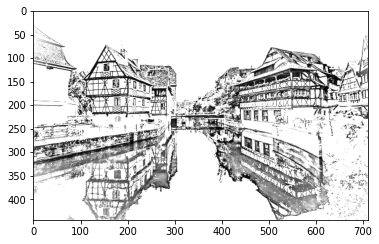

In [ ]:
petitefrance_bright = TF.adjust_brightness(petitefrance_gray, brightness_factor=3)
plt.imshow(ToPILImage()(petitefrance_bright), cmap='gray')

<br>
<br>
<br><hr />

## Part 5: Dataset and input pipeline

<img src="https://storage.googleapis.com/jalammar-ml/tf.data/images/tf.data.png" width="500" height="120"  style="margin-right: 100px" align="left"/>

**Objectives**:

- 1) To build a simple dataset.
- 2) To build an image dataset.
- 3) To perform basic dataset operations.
- 4) To build PyTorch dataset input pipeline for deep learning models.

<br><br>**Simple dataset**

- Generate a dataset of sequential numbers
- access the items in the dataset

In [ ]:
# Make a dataset of few numbers
dataset = torch.arange(10)

# Check the contents of the dataset:
for elem in dataset:
    print(elem.numpy())

0
1
2
3
4
5
6
7
8
9


In [ ]:
# Repeat the dataset 3x
repeated_dataset = dataset.repeat(3)

# display
for elem in repeated_dataset:
    print(elem.numpy())

0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9


In [ ]:
# Make a sub dataset (front)
new_dataset = dataset[0:3]

# display
for elem in new_dataset:
    print(elem.numpy())

0
1
2


In [ ]:
# we can iterate and read the dataset one-by-one
it = iter(dataset)

In [ ]:
# print one by one.
print(next(it).numpy())
print(next(it).numpy())
print(next(it).numpy())

0
1
2


<br><br>**Image dataset**

- We have downloaded a cat and dog dataset.
- Let's transform the data to a PyTorch dataset.

In [ ]:
# Download the cat & dog dataset
!wget https://seafile.unistra.fr/f/ca6dc3c7823f44b4a769/?dl=1 --content-disposition

In [ ]:
# The cat & dog dataset (https://seafile.unistra.fr/f/ca6dc3c7823f44b4a769/?dl=1)
f = gzip.open('td_catsdogs2000_u8.pkl.gz', 'rb')
cat_dog_dataset = pickle.load(f,encoding='bytes')

print(cat_dog_dataset[0].shape)
print(cat_dog_dataset[1].shape)
f.close()

(2000, 96, 96, 3)
(2000, 1)


/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


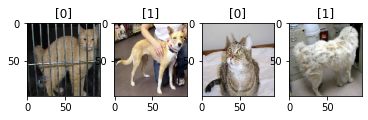

In [ ]:
# Check some images and labels
img_idx = (30, 75, 1500, 895)
for i, idx in enumerate(img_idx):
    plt.subplot(1,len(img_idx),i+1)
    plt.imshow(cat_dog_dataset[0][idx])
    plt.title(cat_dog_dataset[1][idx])

In [ ]:
#Recovers the cats & dogs images from the gzip file
#and creates train and test subfolders
from PIL import Image
import pandas as pd

os.makedirs('dataset/td_catsdogs2000/train/')
os.makedirs('dataset/td_catsdogs2000/test/')
train_split = 0.8
train_samp = np.round(cat_dog_dataset[0].shape[0]*train_split)

for idx in np.arange(cat_dog_dataset[0].shape[0]):
    im = Image.fromarray(cat_dog_dataset[0][idx])
    label = cat_dog_dataset[1][idx]
    if label == 0:
        im_label = 'cat'
    else:
        im_label = 'dog'
    if idx <= train_samp :
        destdir = 'train'
    else:
        destdir = 'test'
    im.save("dataset/td_catsdogs2000/{}/{}_{}.png".format(destdir,im_label,idx))

print('Images treatment done')

Images treatment done


In [ ]:
#Creates the cvs files for the train and test datasets

train_df = pd.DataFrame(columns=['img_name', 'label'])
test_df = pd.DataFrame(columns=['img_name', 'label'])
train_df['img_name'] = os.listdir('dataset/td_catsdogs2000/train/')
test_df['img_name'] =  os.listdir('dataset/td_catsdogs2000/test/')

for idx, i in enumerate(os.listdir("dataset/td_catsdogs2000/train/")):
    if 'cat' in i :
        label = 0
    else :
        label = 1
    train_df['label'][idx] = label
for idx, i in enumerate(os.listdir('dataset/td_catsdogs2000/test/')):
    if 'cat' in i :
        label = 0
    else :
        label = 1
    train_df['label'][idx] = label

train_df.to_csv(r'train_csv.csv', index=False, header=True)
test_df.to_csv(r'test_csv.csv', index=False, header=True)

print('Done')

Done


In [ ]:
# Create custom dataset
from torch.utils.data import Dataset

class CatsDogsDataset(Dataset):
    """Cats and Dogs dataset."""

    def __init__(self, root_dir, annotation_file, transform=None):
        """
        Args:
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.root_dir = root_dir
        self.annotations = pd.read_csv(annotation_file)
        self.transform = transform

    def __len__(self):
        return len(self.annotations)

    def __getitem__(self, idx):
        img_id = self.annotations.iloc[idx, 0]
        img = Image.open(os.path.join(self.root_dir, img_id)).convert("RGB")
        y_label = torch.tensor(float(self.annotations.iloc[idx, 1]))

        if self.transform is not None:
            img = self.transform(img)

        return (img, y_label)

<br><br>**PyTorch dataset input pipeline**

- Let prepare an PyTorch input pipeline with the train dataset
- Iteratively read the image and labels as needed by deep learning model

In [ ]:
#create a trasnformation pipeline (at least to create a torch.tensor from image + one random transformation)
Mypipeline = Compose([
                      ToTensor(),
                      RandomRotation(180),
                     ])


# create train & test datasets (display the number of elements in each dataset)
train_dataset = CatsDogsDataset('./dataset/td_catsdogs2000/train/', 'train_csv.csv', Mypipeline)
test_dataset = CatsDogsDataset('./dataset/td_catsdogs2000/test/', 'test_csv.csv', ToTensor())
print("Number of samples in train dataset : {} ".format(len(train_dataset)))
print("Number of samples in test dataset : {} ".format(len(test_dataset)))


Number of samples in train dataset : 1601 
Number of samples in test dataset : 399 


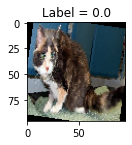

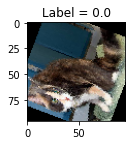

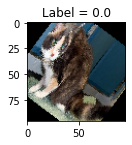

In [ ]:
# Display a random train image multiple time (each time with the same image)
sample_idx = np.random.randint(0, len(train_dataset))
for i in np.arange(3):
    plt.subplot(1,3,i+1)
    plt.imshow(ToPILImage()(train_dataset[sample_idx][0]))
    plt.title("Label = {}".format(train_dataset[sample_idx][1].numpy()))
    plt.show()

<br><br><hr />
# Bonus Exercises
You can complete the following bonus exercises to better understand the concepts.


<hr />

### **Bonus 1:**
<hr />

<font color=red>

[comment]: <> (<img src="notebook_images/todo_ops.jpg"/>)
![alt text](https://drive.google.com/uc?id=137e0qQpty0PF7LlBiaQEOgxhWbktL1j0)

Following the activities in the figure:
    
- a = using `torch.arange` generate tensors from 0... 23.
- b = using `torch.reshape` reshape it to a 4 x 6 tensor as shown
- c = slice the upper part
- d = slice the lower part
- e = using `torch.concat` along `axis=1` to join the two slices as shown
- f = figure out and code the operation going on in the axis=1
- g = figure out and code the operation going on in the axis=0
    
</font>

In [ ]:
# TODO (print every step)
a = torch.arange(24)
b = torch.reshape(a, (4,6))
c = b[0:3,0:2]
d = b[1:,4:]
e = torch.cat([c,d], axis =1)
f = torch.sum(e, axis=1)
g = torch.mean(e.type(torch.float), axis=0)
print(a)
print(b)
print(c)
print(d)
print(e)
print(f)
print(g)

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23])
tensor([[ 0,  1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10, 11],
        [12, 13, 14, 15, 16, 17],
        [18, 19, 20, 21, 22, 23]])
tensor([[ 0,  1],
        [ 6,  7],
        [12, 13]])
tensor([[10, 11],
        [16, 17],
        [22, 23]])
tensor([[ 0,  1, 10, 11],
        [ 6,  7, 16, 17],
        [12, 13, 22, 23]])
tensor([22, 46, 70])
tensor([ 6.,  7., 16., 17.])


<br>
<hr />


### **Bonus 2:**
<hr />

- A. Given the function :
### $f = -3x^3 + 2x^2 - x + \frac{1}{2}\sqrt{x}$
    - Find the derivative  $ \frac{df}{dx} $ and solve for $x=3.7$.
    
</font>

In [ ]:
# Bonus 2:

def f(x):
    return (-3*(x**3)) + (2*(x**2)) - (x) + ((1.0/2.0)*torch.sqrt(x))


x = torch.tensor(3.7, requires_grad=True)

fx = f(x)
fx.backward(x)

print("\nFunction  ::: f(x) = {}".format(fx.detach().numpy()))
print("\nGradients ::: df/dx = {}".format(x.grad.numpy()))
print('')


Function  ::: f(x) = -127.3172378540039

Gradients ::: df/dx = -404.33612060546875



<br>
<hr />

### **Bonus 3:**
<hr />

<font color=red>

- Generate a 2D 9x9 tensor with random values.
- Normalize the tensor such that the values of each row sums to 1.
- Show that they actually sum to 1.
    
</font>

In [ ]:
# Bonus 3
a = torch.rand((9,9))
print(a, a.shape)
b = torch.sum(a, axis=1)
b = torch.reshape(b, (9,1))
print(b)
c = a / b
print(c)
d = torch.sum(c, axis=1)
print(d)

tensor([[0.7504, 0.5893, 0.3381, 0.9696, 0.1807, 0.9594, 0.0800, 0.6639, 0.2017],
        [0.0133, 0.1538, 0.9507, 0.2775, 0.0953, 0.2793, 0.7373, 0.1525, 0.6236],
        [0.8423, 0.0488, 0.6939, 0.5509, 0.6262, 0.1270, 0.5708, 0.1539, 0.3211],
        [0.0946, 0.7365, 0.8580, 0.5544, 0.1147, 0.4839, 0.8300, 0.7164, 0.0993],
        [0.6176, 0.1142, 0.1697, 0.5318, 0.5187, 0.1976, 0.9191, 0.3556, 0.0746],
        [0.3937, 0.8681, 0.9685, 0.9006, 0.4039, 0.6377, 0.6530, 0.4544, 0.3190],
        [0.4260, 0.1826, 0.8397, 0.4546, 0.8206, 0.3571, 0.6894, 0.8193, 0.4024],
        [0.7404, 0.0561, 0.9797, 0.9214, 0.1920, 0.1677, 0.0299, 0.4841, 0.9893],
        [0.6956, 0.5433, 0.8922, 0.1021, 0.3530, 0.4432, 0.5339, 0.6930, 0.9500]]) torch.Size([9, 9])
tensor([[4.7332],
        [3.2833],
        [3.9349],
        [4.4879],
        [3.4989],
        [5.5989],
        [4.9916],
        [4.5607],
        [5.2061]])
tensor([[0.1585, 0.1245, 0.0714, 0.2049, 0.0382, 0.2027, 0.0169, 0.1403, 0.0426

<hr />

### **Bonus 4:**
<hr />

[comment]: <> (<img src="notebook_images/ff1.jpg"/>)
![alt text](https://drive.google.com/uc?id=1MFsndZAPpsgu8iW6kO3KEiVEvON0jJR5)

As shown in the figure beside:
- Given a 2D 3x5 tensor with int values.
- Slice the tensor to have a new tensor consisting of ONLY the 1st, 3rd and 5th columns of the tensor.
    
</font>

In [ ]:
# Bonus 4 :
A = torch.tensor([[1,8,2,0,3], [4,3,5,1,6], [7,6,8,2,9]])
print(A)
B = torch.stack([A[:,0], A[:,2], A[:,4]], axis=1)
print(B)

tensor([[1, 8, 2, 0, 3],
        [4, 3, 5, 1, 6],
        [7, 6, 8, 2, 9]])
tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])


<hr />

### **Bonus 5:**
<hr />

<font color=red>

- Read the image of the car (sample_images/car.jpg)
- Augment it to have 5 different images; you can use rotation, transpose, vertical and horizontal flipping, resize

    
</font>

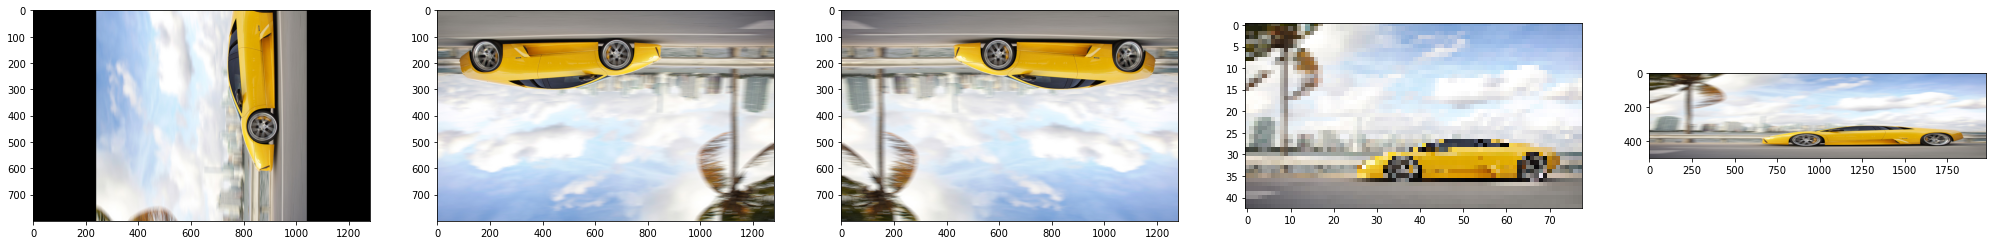

In [ ]:
# Bonus 6:
car = plt.imread(filepath+"car.jpg")
car_tensor = ToTensor()(car)
# rotate
img1 = TF.rotate(car_tensor, angle=90)
# Transpose
img2 = TF.vflip(TF.hflip(car_tensor))
# Vertical flipping
img3 = TF.vflip(car_tensor)
# shrink img
img4 = TF.resize(car_tensor, (43, 78))
#img4 = TF.cast(img4, tf.uint8)
# zoom img
img5 = TF.resize(car_tensor, (500, 1978))
#img5 = TF.cast(img5, tf.uint8)
# Display
fig = plt.figure(figsize=(35,7))
fig.add_subplot(1, 5, 1); plt.imshow(ToPILImage()(img1))
fig.add_subplot(1, 5, 2); plt.imshow(ToPILImage()(img2))
fig.add_subplot(1, 5, 3); plt.imshow(ToPILImage()(img3))
fig.add_subplot(1, 5, 4); plt.imshow(ToPILImage()(img4))
fig.add_subplot(1, 5, 5); plt.imshow(ToPILImage()(img5))
plt.show()

<hr /><hr />

### <font color=green> Congratulations!! this is end of first part </font>